# Lab 4: Basic regression - Predict fuel efficiency



## Imports

In [736]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # we use this library to load the dataset
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Load data

In [737]:
# Load the 'mpg' dataset using seaborn library into a Pandas DataFrame
df = sns.load_dataset('mpg')

MPG dataset can be viewed online at  
https://github.com/mwaskom/seaborn-data/blob/master/mpg.csv

## Data Exploration - Pandas Review

### Show the first 5 rows of the dataset

In [738]:
#your code here
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


### Show the size of the dataframe

In [739]:
#your code here

df.shape

(398, 9)

### Find the columns name and their types (numerical or categorical)

In [740]:
#your code here
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='str')

### Find the number of missing values in each column

In [741]:
#your code here
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

### Handle the missing values in the dataframe

Since the number of missing values is low, we can simply drop the rows containing them. However, as a practice and review, let's substitute the missing values in the numerical columns (if any) with the mean of the respective column and the missing values in the categorical columns (if any) with the median of the respective column.

In [742]:
#your solution here
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())
print(df['horsepower'])

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 398, dtype: float64


### Compute the average and the median weight

In [743]:
#your code here
print(df['weight'].mean())
print(df['weight'].median())

2970.424623115578
2803.5


### Find the number of cars that weight more than 2000 kgs

In [744]:
#your code here
len(df[df['weight'] > 2000])

354

### Find how many cars there are for each number of cylinders

In [745]:
#your code here
df['cylinders'].value_counts()

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64

### Find what are the car models with number of cylinders (3 or 5)

In [746]:
#your code here
df[df['cylinders'].isin([3, 5])]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
71,19.0,3,70.0,97.0,2330,13.5,72,japan,mazda rx2 coupe
111,18.0,3,70.0,90.0,2124,13.5,73,japan,maxda rx3
243,21.5,3,80.0,110.0,2720,13.5,77,japan,mazda rx-4
274,20.3,5,131.0,103.0,2830,15.9,78,europe,audi 5000
297,25.4,5,183.0,77.0,3530,20.1,79,europe,mercedes benz 300d
327,36.4,5,121.0,67.0,2950,19.9,80,europe,audi 5000s (diesel)
334,23.7,3,70.0,100.0,2420,12.5,80,japan,mazda rx-7 gs


### Show the `value_counts()` of `origin` column or show the unique values of this column.

In [747]:
#your code here
df['origin'].value_counts()

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64

## Data Preprocessing

### Use one hot encoding to change the categorical values of `origin` column to numerical values.

- use `pd.get_dummies()` method to do the encoding
- Join the original DataFrame with the new dummy DataFrame with `pd.concat()` and use `axis=1` to concate in horizontal direction.

In [748]:
#your code here

pd.get_dummies(df, columns=['origin'])

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,name,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu,False,False,True
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320,False,False,True
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite,False,False,True
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst,False,False,True
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,ford mustang gl,False,False,True
394,44.0,4,97.0,52.0,2130,24.6,82,vw pickup,True,False,False
395,32.0,4,135.0,84.0,2295,11.6,82,dodge rampage,False,False,True
396,28.0,4,120.0,79.0,2625,18.6,82,ford ranger,False,False,True


### Remove the `name` and `origin` column form the dataframe to have all numerical dataframe.

In [749]:
#your code here

### Does the input needs reshaping?

In [750]:
#your code here
df2.shape

(398, 11)

### Form features `X` and labels `y` based on the processed datafram

In [751]:
#your code here
X = df2.drop(columns=['mpg', 'name'])
y = df['mpg']

### Split the data into training and test sets and form `train_features`, `train_labels`, `test_features`, `test_labels`

In [752]:
from sklearn.model_selection import train_test_split
#your code here
train_features, test_features, train_labels, test_labels = train_test_split(X, y)

print(train_features.shape)
print(test_features.shape)

(298, 9)
(100, 9)


### For simplicity in the following steps, convert the dataset from a pandas DataFrame to a numpy array.

In [753]:
train_features = np.array(train_features, dtype=np.float32)
train_labels = np.array(train_labels, dtype=np.float32)
test_features = np.array(test_features, dtype=np.float32)
test_labels = np.array(test_labels, dtype=np.float32)

### Do some sanity check on the shape of the data before building a model

In [754]:
# your code here
train_features

# Sanity check code
print(f"Train features shape: {train_features.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Test features shape: {test_features.shape}")
print(f"Test labels shape: {test_labels.shape}")

Train features shape: (298, 9)
Train labels shape: (298,)
Test features shape: (100, 9)
Test labels shape: (100,)


## Normalization layer

To ensure stable training of neural networks, we typically normalize the data. This process also enhances the convergence of the gradient descent algorithm.

There is not single way to normalize the data. You can also use `scikit-learn `or `pandas` to do it. However, in this lab, we will use the normalization layer provided by tensorflow which matches the other parts of the model.

The `tf.keras.layers.Normalization` is a clean and simple way to add feature normalization into your model.

The first step is to create the layer:

In [755]:
normalizer = tf.keras.layers.Normalization(axis=-1)

Then, fit the state of the preprocessing layer to the data by calling `Normalization.adapt`.

It calculates the mean and variance of each feature, and store them in the layer

In [756]:
normalizer.adapt(train_features)

When the layer is called, it returns the input data, with each feature independently normalized.

In [757]:
first = train_features[0]
print('First example:', first)
print()
print('Normalized:', normalizer(first).numpy())

First example: [4.000e+00 1.440e+02 9.600e+01 2.665e+03 1.390e+01 8.200e+01 0.000e+00
 1.000e+00 0.000e+00]

Normalized: [[-0.8437028  -0.45712325 -0.18495244 -0.34527278 -0.63951397  1.5623274
  -0.47574934  1.951013   -1.243788  ]]


In [758]:
np.unique(normalizer(train_features).numpy()[:, -1])

array([-1.243788  ,  0.80399555], dtype=float32)

## **Approach #1:** Regression using `Linear Regression`

**You are welcome to use scikit-learn to perform linear regression on this dataset.**

However, here we aim to implement it using TensorFlow.

- As we saw in Lab Week 2, `logistic regression` is essentially a single neuron with a `sigmoid` activation function.

- Similarly, `linear regression` can be viewed as a single neuron with a `linear` activation function.

### **Step 1:** Linear regression model architecture

In [759]:
linear_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(9,)),
    normalizer,
    layers.Dense(1, activation='linear')
])

**Note:** You can define your model all at once like the cell above or you can buid the model incrementaly  (suitable for your assignment)

In [760]:
# Defining the model incrementaly (suitable for your assignment)
linear_model = tf.keras.Sequential()
linear_model.add(tf.keras.layers.Input(shape=(9,)))
linear_model.add(normalizer)
linear_model.add(layers.Dense(1, activation='linear'))

### **Step 2:** Configure the model with Keras `Model.compile()`

The most important arguments to compile are the `loss` and the `optimizer`, since these define what will be optimized (`"mean_absolute_error"`) and how (using the `tf.keras.optimizers.Adam(learning_rate=0.1)`).

**arguments:**
- optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
- loss='mean_absolute_error'

In [761]:
#your code here
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

### **Step 3:** Train the model using the `Model.fit()` for `100` epochs, and store the output in a variable named history.

In [762]:
history = linear_model.fit(train_features, train_labels, epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.4590  
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.4073 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.4111 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.4055 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.4201 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.4441 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.4426 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.4083 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.4103 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.4127 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.4123 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.4355 
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.4268 
Epoch 14/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.4284 
Epoch 15/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s

In [763]:
history.history

{'loss': [23.459007263183594,
  22.407272338867188,
  21.41105079650879,
  20.40549087524414,
  19.42009925842285,
  18.44413948059082,
  17.442575454711914,
  16.408313751220703,
  15.410346031188965,
  14.412670135498047,
  13.412342071533203,
  12.435544967651367,
  11.426835060119629,
  10.428435325622559,
  9.43664264678955,
  8.45162296295166,
  7.485081195831299,
  6.534548759460449,
  5.630960464477539,
  4.803876876831055,
  4.1053290367126465,
  3.5034019947052,
  3.0826375484466553,
  2.8372111320495605,
  2.6664538383483887,
  2.5548713207244873,
  2.5364181995391846,
  2.494903802871704,
  2.4994637966156006,
  2.4801523685455322,
  2.51837420463562,
  2.4909021854400635,
  2.4804348945617676,
  2.4801816940307617,
  2.483767509460449,
  2.4758291244506836,
  2.5007009506225586,
  2.474088430404663,
  2.4774019718170166,
  2.554708480834961,
  2.472853422164917,
  2.483229398727417,
  2.495551586151123,
  2.4971954822540283,
  2.472651958465576,
  2.4878125190734863,
  2.5

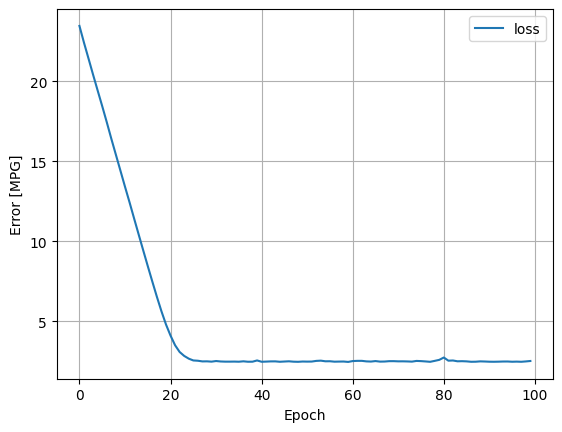

In [764]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

### Get the model summary

In [765]:
linear_model.summary()

Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_16                │ (None, 9)              │            19 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_104 (Dense)               │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51 (212.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 19 (80.00 B)

 Optimizer params: 22 (92.00 B)

### **Step 4:** Evaluate the linear model on the test set using Keras `Model.evaluate()` and see the `mean_absolute_error` and save the result for future comparison.

In [766]:
#your code here
linear_model.evaluate(test_features, test_labels)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.4425 


2.4424920082092285

## **Approach #2:** Regression using a `Deep Neural Network (DNN)`

### Solve the same problem and using deep neural network with the sample architecture;
- 1st hidden layer no. of units =  64
- 2nd hidden layer no. of units = 64
- Choose appropriate `activation` functions for hidden and output layers

In [767]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(9,)),
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='linear')
])

#your code here
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

### Print the model summary (after training). How many parameters are there in the model?

In [768]:
#your code here
model.summary()

Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_16                │ (None, 9)              │            19 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_105 (Dense)               │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,884 (19.08 KB)

 Trainable params: 4,865 (19.00 KB)

 Non-trainable params: 19 (80.00 B)

## Compare the evaluation result of the two approaches, i.e., linear regression and deep neural network.

In [769]:
#your code here
history = model.fit(train_features, train_labels, epochs=60)

Epoch 1/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.2295  
Epoch 2/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.0036 
Epoch 3/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9763 
Epoch 4/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7440 
Epoch 5/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4406 
Epoch 6/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9320 
Epoch 7/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9262 
Epoch 8/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6547 
Epoch 9/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2566 
Epoch 10/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1204 
Epoch 11/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7826 
Epoch 12/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2698 
Epoch 13/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6872 
Epoch 14/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9316 
Epoch 15/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9622 
Ep

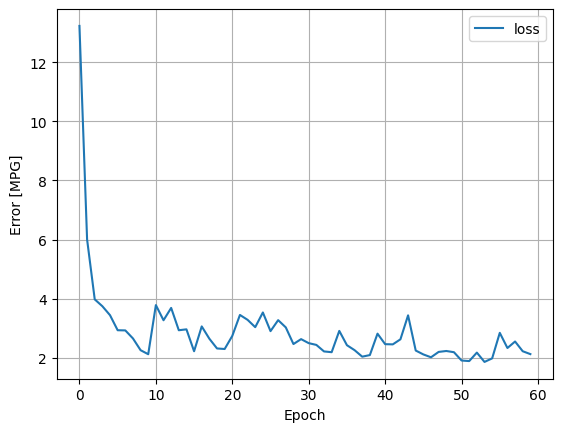

In [770]:
plot_loss(history)

In [771]:
model.evaluate(test_features, test_labels)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7954 


1.7953579425811768

## Use the following large model and evaluate it on the test set.

In [772]:
model_dnn_large = tf.keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='linear')
])

model_dnn_large.compile(loss='mean_absolute_error')

Epoch 1/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 22.4913  
Epoch 2/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.7926 
Epoch 3/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7178 
Epoch 4/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7016 
Epoch 5/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2158 
Epoch 6/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8808 
Epoch 7/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7079 
Epoch 8/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6806 
Epoch 9/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3866 
Epoch 10/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4347 
Epoch 11/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2942 
Epoch 12/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5224 
Epoch 13/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3133 
Epoch 14/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1503 
Epoch 15/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1403 
E

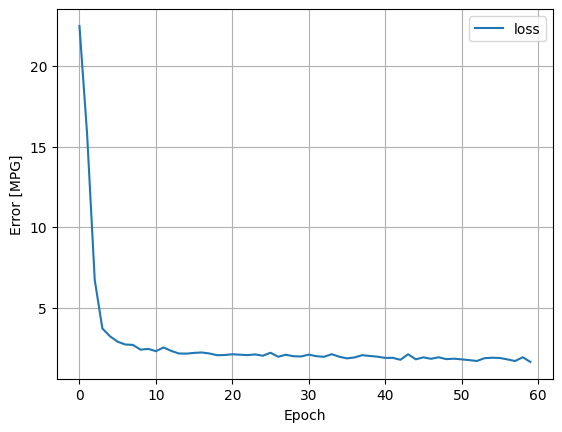

In [773]:
# your code here
history = model_dnn_large.fit(train_features, train_labels, epochs=60)
plot_loss(history)


In [774]:
model_dnn_large.evaluate(test_features, test_labels)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.0985 


2.098489284515381

In [775]:
model_dnn_large.evaluate(train_features, train_labels)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2329 


2.23287034034729

### Explain your observation. Why do you think the large model is not performing well?

- hint: when the number of trainable parameters is very large (even larger than the number of data points), the model may overfit the training data. One way to solve this problem is to use more data.